<a href="https://colab.research.google.com/github/jvishnuvardhan/Stackoverflow_Questions/blob/master/AutoEncoder_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoding_dim= 64


In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
# print('Architecture of AE model')
# autoencoder.summary() # architecture of model
# Encoder
encoder = Model(input_img, encoded)
# print('Architecture of Encoder model')
# encoder.summary() # architecture of model

# Decoder
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1] #Dense(784, activation='sigmoid')(encoded_input)#autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))
# print('Architecture of Decoder model')
# decoder.summary() # architecture of model

# decoder2 = Model(autoencoder.layers[-2], autoencoder.layers[-1])

In [ ]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [ ]:
#load minst data
(x_train, _), (x_test, _) = mnist.load_data()
# normalize data
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 784)
x_test shape = (10000, 784)


In [ ]:
# Fit the data
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.2459 - val_loss: 0.1613
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1409 - val_loss: 0.1248
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1168 - val_loss: 0.1075
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1028 - val_loss: 0.0964
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0938 - val_loss: 0.0892
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0877 - val_loss: 0.0843
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0836 - val_loss: 0.0812
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0808 - val_loss: 0.0789
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0790 - val_loss: 0.0775
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0777 - val_loss: 0.0764

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

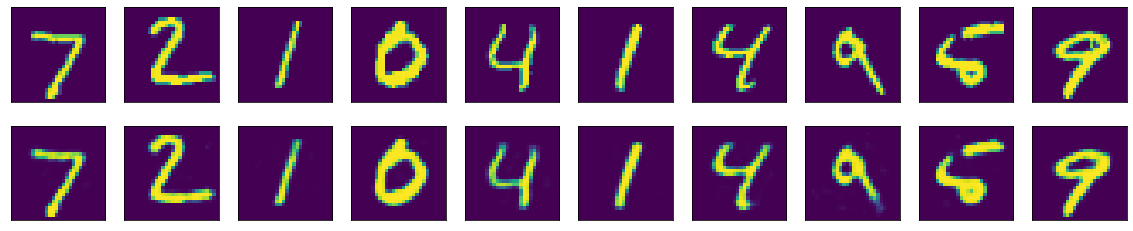

In [ ]:
n=10
plt.figure(figsize=(20,4))

for i in range(n):
  ax=plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  # plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2= plt.subplot(2,n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  # plt.gray()
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)
plt.show()